In [40]:
import requests
import re
from bs4 import BeautifulSoup

In [16]:
webpage = requests.get("https://data.geobasis-bb.de/geobasis/daten/alkis/Vektordaten/shape/").content

In [17]:
soup = BeautifulSoup(webpage)

In [46]:
files = [element.string for element in soup.find_all("a", {'href': re.compile(r'^ALKIS.*')})]

In [49]:
links = ["https://data.geobasis-bb.de/geobasis/daten/alkis/Vektordaten/shape/"+ file for file in files]

In [53]:
from urllib.request import urlretrieve
storage_directory = "/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/ALKIS"

In [60]:
for link in links:
    filename = re.search(r"ALKIS.*", link).group(0)
    urlretrieve(link, f"{storage_directory}/raw/{filename}")

In [64]:
from zipfile import ZipFile
import os

In [65]:
filename = re.search(r"ALKIS.*", links[0]).group(0)

In [66]:
filename_prefix = re.search(r"ALKIS.*(?=.zip)", filename).group(0)

In [69]:
os.makedirs(f"{storage_directory}/raw/{filename_prefix}", exist_ok = True)

In [71]:
for link in links:
    filename = re.search(r"ALKIS.*", link).group(0)
    filename_prefix = re.search(r"ALKIS.*(?=.zip)", filename).group(0)
    os.makedirs(f"{storage_directory}/raw/{filename_prefix}", exist_ok = True)
    with ZipFile(f"{storage_directory}/raw/{filename}", "r") as zip:
        zip.extractall(f"{storage_directory}/raw/{filename_prefix}")

In [1]:
import geopandas as gpd

In [3]:
dat = gpd.read_file("/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/ALKIS/raw/ALKIS_Shape_BAR/SHAPE_1/out/nutzung.shp")

KeyboardInterrupt: 

---

In [77]:
with ZipFile("/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/cartography/raw/dlm250.utm32s.nas_bda.kompakt_2.zip", "r") as zip:
        zip.extractall(f"/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/cartography/raw/test")

In [2]:
import fiona
fiona.supported_drivers["NAS"] = "raw"

In [3]:
shapes = gpd.read_file("/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/cartography/raw/BDA_53002.xml")

<AxesSubplot: >

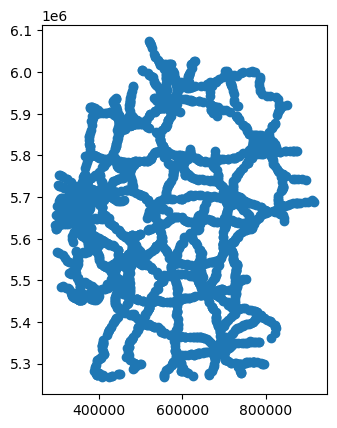

In [13]:
shapes.plot()

In [5]:
import shapely

In [7]:
bbox = [272151.12271898, 5693057.17831404, 481791.0581041, 5930978.42891188]

In [14]:
borders = gpd.read_file("/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/borders/gadm41_DEU_1.json")

In [20]:
shapes = shapes.to_crs(25833)

In [9]:
brandenburg_poly = shapely.geometry.Polygon([(bbox[0], bbox[1]),
                          (bbox[0], bbox[3]),
                          (bbox[2], bbox[3]),
                          (bbox[2], bbox[1])])

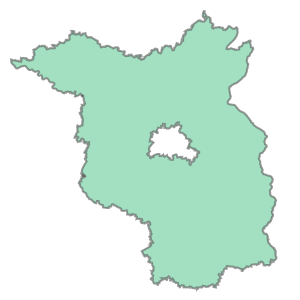

In [27]:
borders.loc[borders["NAME_1"] == "Brandenburg", "geometry"].iloc[0]

In [32]:
import matplotlib.pyplot as plt

In [38]:
shapes[shapes.within(borders.loc[borders["NAME_1"] == "Brandenburg", "geometry"].iloc[0])].shape

(157, 7)

<AxesSubplot: >

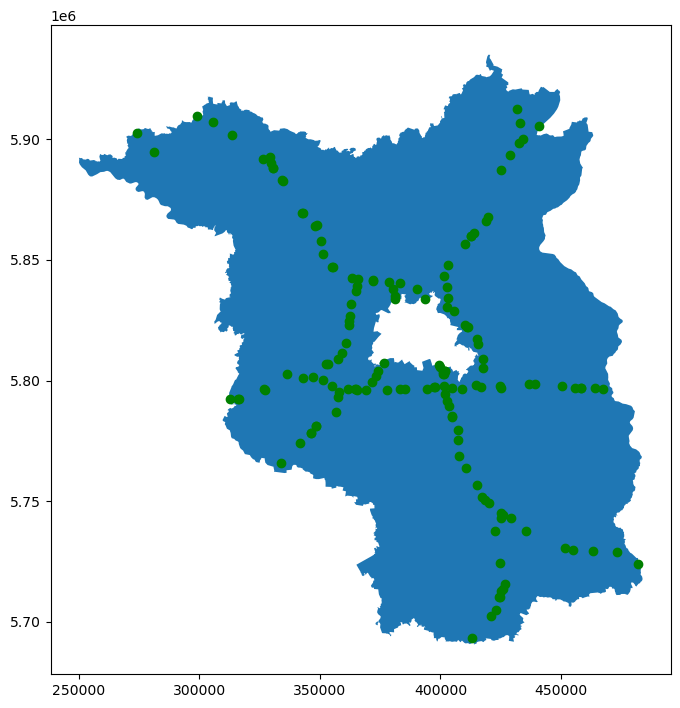

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 10)
borders.loc[borders["NAME_1"] == "Brandenburg",:].plot(ax = ax)
shapes[shapes.within(borders.loc[borders["NAME_1"] == "Brandenburg", "geometry"].iloc[0])].plot(ax = ax, color='green')

In [83]:
import matplotlib.pyplot as plt

<AxesSubplot: >

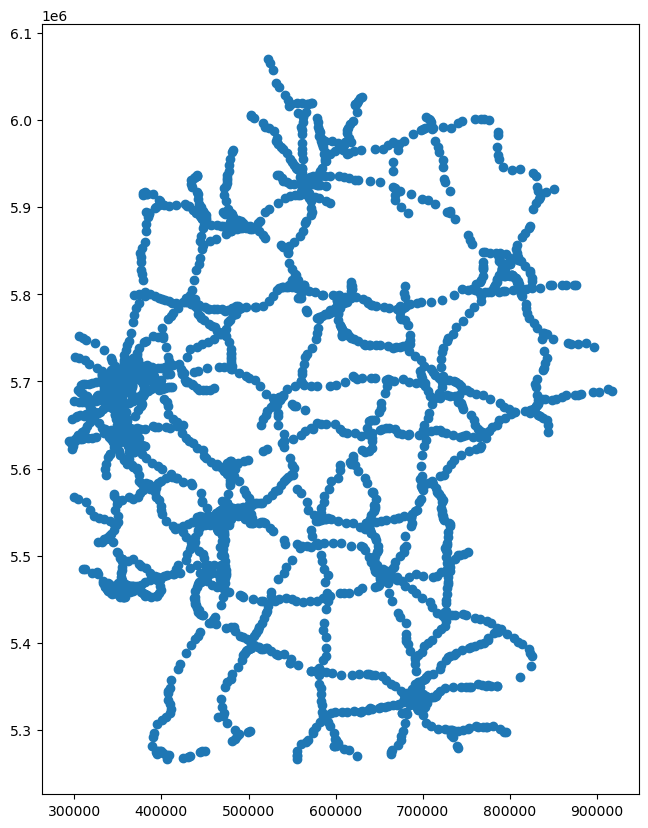

In [91]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 10)
shapes[shapes.art.isin([3000, 3001, 3002, 3003])].plot(ax = ax)

---

In [2]:
import requests
import re
from bs4 import BeautifulSoup

In [3]:
webpage = requests.get("http://download.geofabrik.de/europe/germany.html").content

In [4]:
soup = BeautifulSoup(webpage)

In [9]:
#sublink = soup.find_all("tr", {"onmouseover": re.compile(r'germany')})[0].find("a", string = "[.osm.pbf]")["href"]
sublinks = [link["href"] for link in soup.find_all("a", string = "[.osm.pbf]")]

In [11]:
sublinks

['germany/baden-wuerttemberg-latest.osm.pbf',
 'germany/bayern-latest.osm.pbf',
 'germany/berlin-latest.osm.pbf',
 'germany/brandenburg-latest.osm.pbf',
 'germany/bremen-latest.osm.pbf',
 'germany/hamburg-latest.osm.pbf',
 'germany/hessen-latest.osm.pbf',
 'germany/mecklenburg-vorpommern-latest.osm.pbf',
 'germany/niedersachsen-latest.osm.pbf',
 'germany/nordrhein-westfalen-latest.osm.pbf',
 'germany/rheinland-pfalz-latest.osm.pbf',
 'germany/saarland-latest.osm.pbf',
 'germany/sachsen-latest.osm.pbf',
 'germany/sachsen-anhalt-latest.osm.pbf',
 'germany/schleswig-holstein-latest.osm.pbf',
 'germany/thueringen-latest.osm.pbf']

In [16]:
from urllib.request import urlretrieve

In [18]:
sublink

'germany/baden-wuerttemberg-latest.osm.pbf'

In [19]:
for sublink in sublinks:
    link = f"http://download.geofabrik.de/europe/{sublink}"
    filename = re.search(r"(?<=germany/).*", link).group(0)
    urlretrieve(link, f"/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/OSM/raw/{filename}")

In [2]:
import pyrosm as psm

In [4]:
# Initialize the OSM parser object
osm = psm.OSM("/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/OSM/raw/baden-wuerttemberg-latest.osm.pbf")

In [5]:
# Filter for roads
# https://pyrosm.readthedocs.io/en/latest/custom_filter.html
# https://wiki.openstreetmap.org/wiki/Map_features#Link_roads
link_roads = ["motorway_link", "trunk_link", "primary_link", "secondary_link", "tertiary_link] #"
link_roads = osm.get_data_by_custom_criteria(custom_filter = {"link_roads": link_roads},
                                        # Keep data matching the criteria above
                                        filter_type="keep",
                                        # Do not keep nodes (point data)    
                                        keep_nodes=True, 
                                        keep_ways=False, 
                                        keep_relations=False)

In [1]:
link_roads

NameError: name 'link_roads' is not defined